# ELS Valuation Practice

## 1 Stock ELS

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import seaborn as sns
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl, plt
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
from datetime import datetime, date

In [ ]:
# Set the start and end date
start_date = '2010-01-01'
end_date = '2024-06-15'

In [ ]:
ks200 = yf.download('^KS200', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
ks200.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-10,367.760010,370.350006,366.350006,367.459991,367.459991,116200
2024-06-11,369.609985,369.899994,367.149994,367.709991,367.709991,127500
2024-06-12,368.429993,371.709991,367.899994,371.119995,371.119995,134900
2024-06-13,376.929993,378.809998,374.649994,374.750000,374.750000,249100
2024-06-14,375.760010,377.679993,374.500000,376.000000,376.000000,173200


In [ ]:
ks200['Return']=np.log(ks200['Adj Close']/ks200['Adj Close'].shift(1))
ks200.tail()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2024-06-10,367.760010,370.350006,366.350006,367.459991,367.459991,116200,-0.010638
2024-06-11,369.609985,369.899994,367.149994,367.709991,367.709991,127500,0.000680
2024-06-12,368.429993,371.709991,367.899994,371.119995,371.119995,134900,0.009231
2024-06-13,376.929993,378.809998,374.649994,374.750000,374.750000,249100,0.009734
2024-06-14,375.760010,377.679993,374.500000,376.000000,376.000000,173200,0.003330


In [ ]:
ks200['Mov_vol']=ks200['Return'].rolling(window=245).std()*math.sqrt(245)
ks200.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,Mov_vol
Date,,,,,,,,
2024-06-10,367.760010,370.350006,366.350006,367.459991,367.459991,116200,-0.010638,0.169155
2024-06-11,369.609985,369.899994,367.149994,367.709991,367.709991,127500,0.000680,0.168766
2024-06-12,368.429993,371.709991,367.899994,371.119995,371.119995,134900,0.009231,0.168871
2024-06-13,376.929993,378.809998,374.649994,374.750000,374.750000,249100,0.009734,0.169062
2024-06-14,375.760010,377.679993,374.500000,376.000000,376.000000,173200,0.003330,0.169003


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

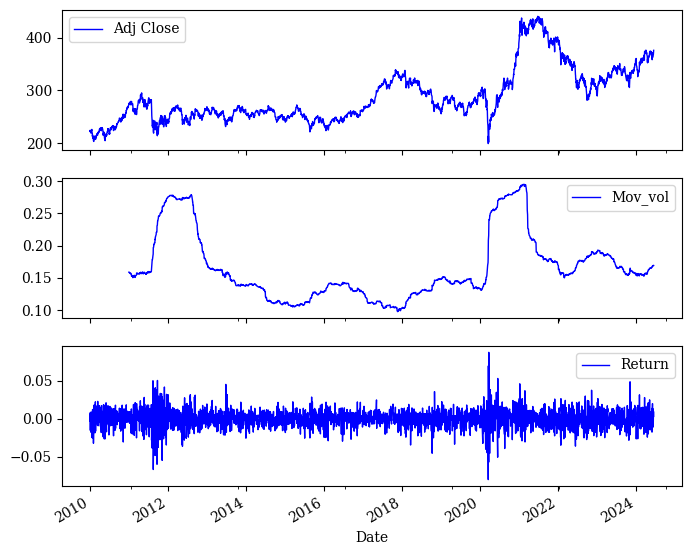

In [ ]:
ks200[['Adj Close','Mov_vol', 'Return']].plot(subplots=True, style='b', lw='1', figsize=(8,7))

In [ ]:
n=10000    # 시뮬레이션 횟수
r=0.0325    # 이자율, 3년 국고채 금리
vol=0.1981  # 변동성
n0=date.toordinal(date(2024,6,20))  # 최초 기준가격 결정일
n1=date.toordinal(date(2024,12,18))  # 1차 조기 상환일
n2=date.toordinal(date(2025,6,18))  # 2차 조기 상환일
n3=date.toordinal(date(2025,12,17))  # 3차 조기 상환일
n4=date.toordinal(date(2026,6,17))  # 4차 조기 상환일
n5=date.toordinal(date(2026,12,16))  # 5차 조기 상환일
n6=date.toordinal(date(2027,6,16))  # 만기 상환일

check_day=np.array([n1-n0, n2-n0, n3-n0, n4-n0, n5-n0, n6-n0])
oneyear=365; tot_date=n6-n0
dt=1/oneyear
S=np.zeros([tot_date+1, 1])
S[0]=100.0  # 기초자산 초기값
strike_price=np.array([0.95, 0.95, 0.90, 0.90, 0.85, 0.80])*S[0]  # 조기 행사가격
repay_n=len(strike_price) # 조기상환 횟수

early_count = np.zeros([repay_n, 1]) # 각 조기상환기간 충족횟수
maturity_count = 0 # 만기상환 발생횟수
lose_count = 0 # 만기손실 발생횟수

coupon_rate=np.array([0.03, 0.06, 0.09, 0.12, 0.15, 0.18])  # 조기 상환시 쿠폰 이자율
payment=np.zeros([repay_n, 1])
facevalue=10000  # 액면금액
tot_payoff=np.zeros([repay_n, 1])  # 전체 페이오프
payoff=np.zeros([repay_n, 1])  # 페이오프
discount_payoff=np.zeros([repay_n, 1])  # 페이오프의 현가
kib=0.55*S[0]; dummy=0.18  # 낙인 배리어, 더미 이자율

In [ ]:
for j in range(repay_n):
    payment[j]=facevalue*(1+coupon_rate[j])

In [ ]:
for i in range(n):
    z=np.random.normal(0, 1, size=[tot_date,1])  # 만기상환일 만큼의 난수 생성
    for j in range(tot_date):
        S[j+1]=S[j]*np.exp((r-0.5*vol**2)*dt+vol*np.sqrt(dt)*z[j])  # 임의의 주가 경로 생성
    S_checkday=S[check_day]
    payoff=np.zeros([repay_n, 1]); repay_event=0
    for j in range(repay_n):
        if S_checkday[j] >= strike_price[j]:  # 조기상환일에 주가를 체크, 조기 상환여부 결정
            payoff[j]=payment[j]
            early_count[j] += 1
            repay_event=1
            break
    if repay_event == 0:  # 조기상환 되지 않고 만기까지 온 경우
       if min(S) > kib:  # 낙인 배리어 아래로 내려간 적이 없는 경우
           payoff[-1]=facevalue*(1+dummy)
           maturity_count += 1
       else:  # 낙인 배리어 아래로 내려간 적이 있는 경우
           payoff[-1]=facevalue*(S[-1]/S[0])
           lose_count += 1
    tot_payoff=tot_payoff+payoff
mean_payoff=tot_payoff/n
for j in range(repay_n):  # 페이오프를 무위험 이자율로 할인하여 현재 가격을 구함
    discount_payoff[j]=mean_payoff[j]*np.exp(-r*check_day[j]/oneyear)
price=np.sum(discount_payoff)
print(price)

10029.027794278723


In [ ]:
print('총 시뮬레이션 횟수 : %d' % (n))
print('조기상환 발생횟수')
for j in range(repay_n):
    print('%d차 : %d, 발생빈도 : %.2f' % (j+1, early_count[j], early_count[j]/n*100),"%")

print('만기상환 발생횟수 : %d, 발생빈도 : %.2f' % (maturity_count, (maturity_count)/n*100), "%")
print('만기손실 발생횟수 : %d, 발생빈도 : %.2f' % (lose_count, (lose_count/n)*100), "%")

총 시뮬레이션 횟수 : 10000
조기상환 발생횟수
1차 : 6623, 발생빈도 : 66.23 %
2차 : 970, 발생빈도 : 9.70 %
3차 : 692, 발생빈도 : 6.92 %
4차 : 292, 발생빈도 : 2.92 %
5차 : 289, 발생빈도 : 2.89 %
6차 : 242, 발생빈도 : 2.42 %
만기상환 발생횟수 : 491, 발생빈도 : 4.91 %
만기손실 발생횟수 : 401, 발생빈도 : 4.01 %


<ipython-input-12-0e48ea33c432>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%d차 : %d, 발생빈도 : %.2f' % (j+1, early_count[j], early_count[j]/n*100),"%")


In [ ]:
def thomas(alpha, beta, gamma, f):
    n=len(f)
    v=np.zeros(n)
    [aa, dd, cc, bb]=map(np.array,[alpha, beta, gamma, f])
    for i in range(1, n):
        mult=aa[i]/dd[i-1]
        dd[i]=dd[i]-mult*cc[i-1]
        bb[i]=bb[i]-mult*bb[i-1]
    v[n-1]=bb[n-1]/dd[n-1]
    for i in range(n-2, -1, -1):
        v[i]=(bb[i]-cc[i]*v[i+1])/dd[i]
    return v

In [ ]:
facevalue=10000; R=300; volatility=0.1981
r=0.0325; Nx=301; h=R/Nx; x0=100
x=np.linspace(0, R, Nx); T=3
Nt=360*T; dt=T/Nt
u=np.zeros((Nx, Nt+1)); ku=np.zeros((Nx, Nt+1))
coupon_rate=np.array([0.18, 0.15, 0.12, 0.09, 0.06, 0.03])
strike_price=np.array([0.80, 0.85, 0.90, 0.90, 0.95, 0.95])
step=np.array([np.rint(Nt/6), np.rint(2*Nt/6), np.rint(3*Nt/6), np.rint(4*Nt/6), np.rint(5*Nt/6), Nt+1])
dummy=0.18; kib=0.55

In [ ]:
for i in range (0,Nx):
    if (x[i]<kib*x0):
        u[i,0]=x[i]/x0*facevalue
        ku[i,0]=x[i]/x0*facevalue
    elif (x[i]<strike_price[0]*x0):
        u[i,0]=facevalue*(1+dummy)
        ku[i,0]=x[i]/x0*facevalue
    else:
        u[i,0]=facevalue*(1+coupon_rate[0])
        ku[i,0]=facevalue*(1+coupon_rate[0])
[a,d,c,b]=map(np.zeros, [Nx, Nx, Nx, Nx])
a[:]=r*x/(2*h)-(volatility*x)**2/(2*h**2)
d[:]=(volatility*x)**2/(h**2)+r+(1/dt)
c[:]=-r*x/(2*h)-(volatility*x)**2/(2*h**2)
a[Nx-1]=a[Nx-1]-c[Nx-1]; d[Nx-1]=d[Nx-1]+2*c[Nx-1]
tag=0

for n in range (0,Nt):
    if (n==step[tag]):
        s=np.min(np.where(x>=x0*strike_price[tag+1]))
        u[s:Nx+1,n]=facevalue*(1+coupon_rate[tag+1])
        ku[s:Nx+1,n]=facevalue*(1+coupon_rate[tag+1])
        tag=tag+1
    s=np.min(np.where(x>=x0*kib))
    u[0:s,n]=ku[0:s, n]
    b=u[:,n]/dt
    u[:,n+1]=thomas(a,d,c,b)
    b=ku[:,n]/dt
    ku[:,n+1]=thomas(a,d,c,b)

ii=np.where(x==100)
print('Price=%f'%(u[ii,Nt]))

Price=10013.926355


<ipython-input-15-d5f65577a443>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Price=%f'%(u[ii,Nt]))


## 2 Stocks ELS

In [ ]:
import yfinance as yf
import seaborn as sns
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl, plt
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
from datetime import datetime, date
from numpy.ma.core import correlate

In [ ]:
# Set the start and end date
start_date = '2010-01-01'
end_date = '2024-06-15'

In [ ]:
EURO50 = yf.download('^STOXX50E', start_date, end_date) # EUROSTOXX50
HSCEI = yf.download('^HSCE',start_date, end_date) #HSCEI

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
eqt1 = pd.merge(EURO50['Adj Close'].to_frame(), HSCEI['Adj Close'].to_frame(),left_index=True, right_index=True, how='inner')
eqt1.columns=['EURO50','HSCEI']
eqt1.head()

,EURO50,HSCEI
Date,,
2010-01-04,3017.800049,12750.549805
2010-01-05,3012.360107,13142.030273
2010-01-06,3009.659912,13246.209961
2010-01-07,3007.340088,13073.200195
2010-01-08,3017.850098,13035.089844


In [ ]:
rtn= (np.log(eqt1) - np.log(eqt1.shift(1)) )*100
rtn.columns=['r_euro','r_hscei']
rtn.head()

,r_euro,r_hscei
Date,,
2010-01-04,NaN,NaN
2010-01-05,-0.180424,3.024112
2010-01-06,-0.089677,0.789596
2010-01-07,-0.077109,-1.314712
2010-01-08,0.348869,-0.291941


In [ ]:
eqt = pd.merge(eqt1,rtn,left_index=True, right_index=True, how='inner')
eqt.head()

,EURO50,HSCEI,r_euro,r_hscei
Date,,,,
2010-01-04,3017.800049,12750.549805,NaN,NaN
2010-01-05,3012.360107,13142.030273,-0.180424,3.024112
2010-01-06,3009.659912,13246.209961,-0.089677,0.789596
2010-01-07,3007.340088,13073.200195,-0.077109,-1.314712
2010-01-08,3017.850098,13035.089844,0.348869,-0.291941


In [ ]:
eqt['Mov_vol_EURO']=eqt['r_euro'].rolling(window=245).std()*math.sqrt(245)
eqt['Mov_vol_HSCE']=eqt['r_hscei'].rolling(window=245).std()*math.sqrt(245)
eqt.tail()

,EURO50,HSCEI,r_euro,r_hscei,Mov_vol_EURO,Mov_vol_HSCE
Date,,,,,,
2024-06-07,5051.310059,6510.370117,-0.351366,-0.684097,12.134845,25.319733
2024-06-11,4965.089844,6452.060059,-1.721623,-0.899684,12.241744,25.329871
2024-06-12,5034.430176,6359.359863,1.386895,-1.447175,12.313503,25.369896
2024-06-13,4935.500000,6421.810059,-1.984636,0.977230,12.482175,25.371133
2024-06-14,4839.140137,6374.660156,-1.971694,-0.736924,12.645675,25.381615


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

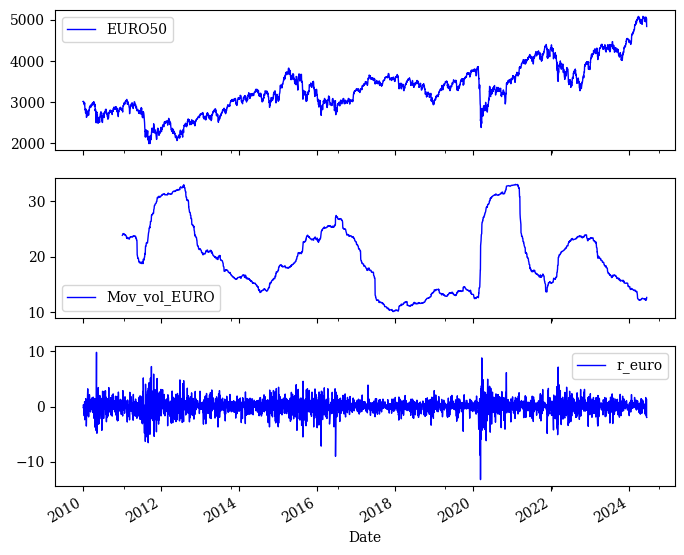

In [ ]:
eqt[['EURO50','Mov_vol_EURO', 'r_euro']].plot(subplots=True, style='b', lw='1', figsize=(8,7))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

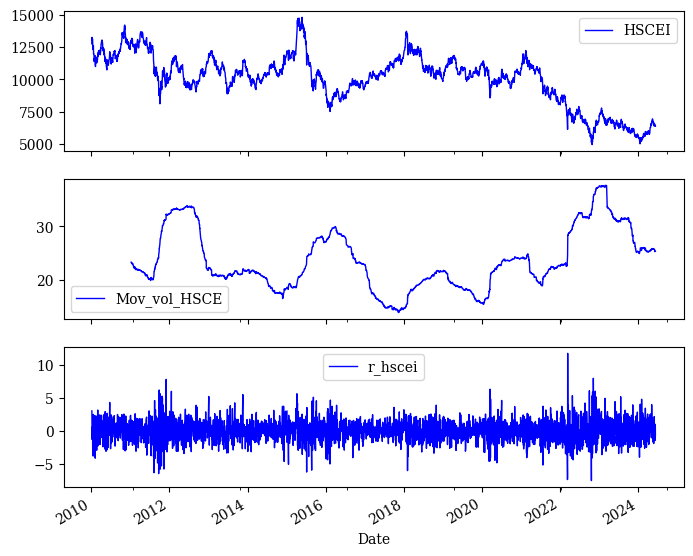

In [ ]:
eqt[['HSCEI','Mov_vol_HSCE', 'r_hscei']].plot(subplots=True, style='b', lw='1', figsize=(8,7))

In [ ]:
pr = eqt[['EURO50','HSCEI']]
pr.head()

,EURO50,HSCEI
Date,,
2010-01-04,3017.800049,12750.549805
2010-01-05,3012.360107,13142.030273
2010-01-06,3009.659912,13246.209961
2010-01-07,3007.340088,13073.200195
2010-01-08,3017.850098,13035.089844


In [ ]:
print(pr.describe())
print('skeness: ', pr.skew(axis=0))
print('kurtosis: ', pr.kurtosis(axis=0))

            EURO50         HSCEI
count  3467.000000   3467.000000
mean   3327.346060  10039.718744
std     603.572195   1952.816130
min    1995.010010   4938.560059
25%    2910.574951   9273.560059
50%    3300.479980  10395.370117
75%    3636.010010  11284.330078
max    5085.080078  14801.940430
skeness:  EURO50    0.430798
HSCEI    -0.592711
dtype: float64
kurtosis:  EURO50    0.034931
HSCEI    -0.010154
dtype: float64


In [ ]:
pr.corr()

,EURO50,HSCEI
EURO50,1.000000,-0.508876
HSCEI,-0.508876,1.000000


In [ ]:
rt = eqt[['r_euro','r_hscei']]
rt.head()

,r_euro,r_hscei
Date,,
2010-01-04,NaN,NaN
2010-01-05,-0.180424,3.024112
2010-01-06,-0.089677,0.789596
2010-01-07,-0.077109,-1.314712
2010-01-08,0.348869,-0.291941


In [ ]:
print(rt.describe())
print('skeness: ', rt.skew(axis=0))
print('kurtosis: ', rt.kurtosis(axis=0))

            r_euro      r_hscei
count  3466.000000  3466.000000
mean      0.013624    -0.020001
std       1.326469     1.552911
min     -13.240515    -7.583825
25%      -0.574593    -0.892811
50%       0.051236    -0.033392
75%       0.652204     0.864756
max       9.846568    11.778561
skeness:  r_euro    -0.485054
r_hscei    0.173438
dtype: float64
kurtosis:  r_euro     7.918635
r_hscei    2.876093
dtype: float64


In [ ]:
rt.corr()

,r_euro,r_hscei
r_euro,1.000000,0.360739
r_hscei,0.360739,1.000000


In [ ]:
n=10000; r=0.0325  # 시뮬레이션 횟수, 무위험이자율
x_vol=0.169; y_vol=0.2371  # 두 지수의 연간 변동성
n0=date.toordinal(date(2024, 6, 20))  # 최초 기준가격 결정일
n1=date.toordinal(date(2024, 12, 20))  # 1차 조기 상환일
n2=date.toordinal(date(2025, 6, 20))  # 2차 조기 상환일
n3=date.toordinal(date(2025, 12, 19))  # 3차 조기 상환일
n4=date.toordinal(date(2026, 6, 18))  # 4차 조기 상환일
n5=date.toordinal(date(2026, 12, 18))  # 5차 조기 상환일
n6=date.toordinal(date(2027, 6, 18))  # 만기 상환일
check_day=np.array([n1-n0, n2-n0, n3-n0, n4-n0, n5-n0, n6-n0])
rho=0.5795; corr=np.array([[1, rho], [rho, 1]])  # 상관계수
coupon_rate=np.array([0.0368, 0.0736, 0.1104, 0.1472, 0.184, 0.2208])  # 조기 상환시 쿠폰 이자율
oneyear=365; tot_date=n6-n0; dt=1/oneyear
k=np.linalg.cholesky(corr)
S1=np.zeros([tot_date+1, 1])
S2=np.zeros([tot_date+1, 1])
S1[0]=100.0; S2[0]=100.0  # 기초자산 초기값
ratio_S1=S1[0]; ratio_S2=S2[0]
strike_price=np.array([0.925, 0.90, 0.90, 0.85, 0.80, 0.75])  # 조기 행사가격
repay_n=len(strike_price) # 조기상환 횟수
payment=np.zeros([repay_n, 1])
payoff=np.zeros([repay_n, 1])  # 페이오프
tot_payoff=np.zeros([repay_n, 1])  # 전체 페이오프
discount_payoff=np.zeros([repay_n, 1])  # 페이오프의 현가
early_count = np.zeros([repay_n, 1]) # 각 조기상환기간 충족횟수
maturity_count = 0 # 만기상환 발생횟수
lose_count = 0 # 만기손실 발생횟수
facevalue=10**4  # 액면금액
kib=0.45; dummy=0.2208  # 낙인 배리어, 더미 이자율
for j in range(repay_n):
    payment[j]=facevalue*(1+coupon_rate[j])

In [ ]:
for i in range(n):
    w0=np.random.normal(0, 1, size=[tot_date,2])  # 만기상환일 만큼의 난수 생성
    w0=np.transpose(w0)
    w=np.matmul(k, w0)
    for j in range(tot_date):
        S1[j+1]=S1[j]*np.exp((r-0.5*x_vol**2)*dt+x_vol*np.sqrt(dt)*w[0, j])  #
        S2[j+1]=S2[j]*np.exp((r-0.5*y_vol**2)*dt+y_vol*np.sqrt(dt)*w[1, j])  #
    R1=S1/ratio_S1; R2=S2/ratio_S2
    WP=np.minimum(R1, R2)
    WP_checkday=WP[check_day]
    payoff=np.zeros([repay_n, 1]); repay_event=0
    for j in range(repay_n):
        if WP_checkday[j] >= strike_price[j]:  # 조기상환일에 주가를 체크, 조기 상환여부 결정
            payoff[j]=payment[j]
            early_count[j] += 1
            repay_event=1
            break
    if repay_event == 0:  # 조기상환 되지 않고 만기까지 온 경우
       if min(WP) > kib:  # 낙인 배리어 아래로 내려간 적이 없는 경우
           payoff[-1]=facevalue*(1+dummy)
           maturity_count += 1
       else:  # 낙인 배리어 아래로 내려간 적이 있는 경우
           WPL=(WP[-1]+WP[-2]+WP[-3])/3
           payoff[-1]=facevalue*WPL
           lose_count += 1
    tot_payoff=tot_payoff + payoff
mean_payoff=tot_payoff/n
for j in range(repay_n):  # 페이오프를 무위험 이자율로 할인하여 현재 가격을 구함
    discount_payoff[j]=mean_payoff[j]*np.exp(-r*check_day[j]/oneyear)
price=np.sum(discount_payoff)
print(price)

10183.103904184203


In [ ]:
print('총 시뮬레이션 횟수 : %d' % (n))
print('조기상환 발생횟수')
for j in range(repay_n):
    print('%d차 : %d, 발생빈도 : %.2f' % (j+1, early_count[j], early_count[j]/n*100),"%")

print('만기상환 발생횟수 : %d, 발생빈도 : %.2f' % (maturity_count, (maturity_count)/n*100), "%")
print('만기손실 발생횟수 : %d, 발생빈도 : %.2f' % (lose_count, (lose_count/n)*100), "%")

총 시뮬레이션 횟수 : 10000
조기상환 발생횟수
1차 : 5924, 발생빈도 : 59.24 %
2차 : 1291, 발생빈도 : 12.91 %
3차 : 471, 발생빈도 : 4.71 %
4차 : 445, 발생빈도 : 4.45 %
5차 : 384, 발생빈도 : 3.84 %
6차 : 301, 발생빈도 : 3.01 %
만기상환 발생횟수 : 836, 발생빈도 : 8.36 %
만기손실 발생횟수 : 348, 발생빈도 : 3.48 %


<ipython-input-17-0e48ea33c432>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%d차 : %d, 발생빈도 : %.2f' % (j+1, early_count[j], early_count[j]/n*100),"%")


In [ ]:
def thomas(alpha, beta, gamma, f):
    n=len(f)
    v=np.zeros(n)
    [aa, dd, cc, bb]=map(np.array,[alpha, beta, gamma, f])
    for i in range(1, n):
        mult=aa[i]/dd[i-1]
        dd[i]=dd[i]-mult*cc[i-1]
        bb[i]=bb[i]-mult*bb[i-1]
    v[n-1]=bb[n-1]/dd[n-1]
    for i in range(n-2, -1, -1):
        v[i]=(bb[i]-cc[i]*v[i+1])/dd[i]
    return v

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

facevalue=10000; R=300;
x_volatility=0.169; y_volatility=0.2371;
rho=0.5795; r=0.0325; Nx=61; Ny=Nx; h=R/Nx;
x0=100; y0=100; x=np.linspace(0, R, Nx); y=x;
T=3; Nt=360*T; dt=T/Nt; lst=[Nx, Ny]
[u, ku, old_u, old_ku]=map(np.zeros, [lst, lst, lst, lst])
coupon_rate=np.array([0.2208, 0.184, 0.1472, 0.1104, 0.0736, 0.0368])
strike_price=np.array([0.75, 0.80, 0.85, 0.90, 0.90, 0.925])
step=np.array([np.rint(Nt/6), np.rint(2*Nt/6), np.rint(3*Nt/6), np.rint(4*Nt/6), np.rint(5*Nt/6), np.rint(6*Nt/6),Nt+1])
dummy=0.2208; kib=0.45

In [ ]:
for i in range (0,Nx):
    for j in range(0, Ny):
        if (x[i]<kib*x0 or y[j]<kib*y0):
            u[i,j]=np.minimum(x[i], y[j])/x0*facevalue
            ku[i,j]=np.minimum(x[i], y[j])/x0*facevalue
        elif (x[i]<=strike_price[0]*x0 or y[j]<=strike_price[0]*x0):
            u[i,j]=facevalue*(1+dummy)
            ku[i,j]=np.minimum(x[i], y[j])/x0*facevalue
        else:
            u[i,j]=facevalue*(1+coupon_rate[0])
            ku[i,j]=facevalue*(1+coupon_rate[0])
[ax,dx,cx,ay,dy,cy]=map(np.zeros, [Nx-2, Nx-2, Nx-2, Ny-2, Ny-2, Ny-2])
ax[:]=-0.5*(x_volatility*x[1:Nx-1]/h)**2+0.5*r*x[1:Nx-1]/h
dx[:]=1/dt+(x_volatility*x[1:Nx-1]/h)**2+r*0.5
cx[:]=-0.5*(x_volatility*x[1:Nx-1]/h)**2-0.5*r*x[1:Nx-1]/h
ax[Nx-3]=ax[Nx-3]-cx[Nx-3]
dx[Nx-3]=dx[Nx-3]+2*cx[Nx-3]

ay[:]=-0.5*(y_volatility*y[1:Ny-1]/h)**2+0.5*r*y[1:Ny-1]/h
dy[:]=1/dt+(y_volatility*y[1:Ny-1]/h)**2+r*0.5
cy[:]=-0.5*(y_volatility*y[1:Ny-1]/h)**2-0.5*r*y[1:Ny-1]/h
ay[Ny-3]=ay[Ny-3]-cy[Ny-3]
dy[Ny-3]=dy[Ny-3]+2*cy[Ny-3];
tag=0
bx=np.zeros(Nx-2); by=np.zeros(Nx-2);

for n in range (0,Nt):
    if (n==step[tag]):
        gx=np.min(np.where(x>=x0*strike_price[tag+1]))
        gy=np.min(np.where(y>=y0*strike_price[tag+1]))
        u[gx:Nx-1,gy:Ny-1]=facevalue*(1+coupon_rate[tag+1])
        ku[gx:Nx-1,gy:Ny-1]=facevalue*(1+coupon_rate[tag+1])
        tag+=1
    gx=np.min(np.where(x>=x0*kib))
    gy=np.min(np.where(y>=y0*kib))
    u[:,0:gy+1]=ku[:,0:gy+1]
    u[0:gx+1,:]=ku[0:gx+1,:]
    old_u=u; old_ku=ku;
    for j in range(1,Ny-1):
        bx[0:Nx-1]=old_u[1:Nx-1,j]/dt+0.5*rho*x_volatility*y_volatility*x[1:Nx-1]*y[j]*(old_u[2:Nx,j+1]-old_u[2:Nx,j-1]-old_u[0:Nx-2,j+1]+old_u[0:Nx-2,j-1])/(4*h**2)
        u[1:Nx-1, j]=thomas(ax,dx,cx,bx)
    u[Nx-1,1:Ny-1]=2*u[Nx-2,1:Ny-1]-u[Nx-3,1:Ny-1]
    u[:,Ny-1]=2*u[:,Ny-2]-u[:,Ny-3]
    old_u=u;
    for i in range(1,Nx-1):
        by[0:Ny-1]=old_u[i,1:Ny-1]/dt+0.5*rho*x_volatility*y_volatility*x[i]*y[1:Ny-1]*(old_u[i+1,2:Ny]-old_u[i+1,0:Ny-2]-old_u[i-1,2:Ny]+old_u[i-1,0:Ny-2])/(4*h**2)
        u[i,1:Ny-1]=thomas(ay,dy,cy,by)
    u[1:Nx-1,Ny-1]=2*u[1:Nx-1,Ny-2]-u[1:Nx-1,Ny-3]
    u[Nx-1,:]=2*u[Nx-2,:]-u[Nx-3,:]
    for j in range(1,Ny-1):
        bx[0:Nx-1]=old_ku[1:Nx-1,j]/dt+0.5*rho*x_volatility*y_volatility*x[1:Nx-1]*y[j]*(old_ku[2:Nx,j+1]-old_ku[2:Nx,j-1]-old_ku[0:Nx-2,j+1]+old_ku[0:Nx-2,j-1])/(4*h**2)
        ku[1:Nx-1, j]=thomas(ax,dx,cx,bx)
    ku[Nx-1,1:Ny-1]=2*ku[Nx-2,1:Ny-1]-ku[Nx-3,1:Ny-1]
    ku[:,Ny-1]=2*ku[:,Ny-2]-ku[:,Ny-3]
    old_ku=ku;
    for i in range(1,Nx-1):
        by[0:Ny-1]=old_ku[i,1:Ny-1]/dt+0.5*rho*x_volatility*y_volatility*x[i]*y[1:Ny-1]*(old_ku[i+1,2:Ny]-old_ku[i+1,0:Ny-2]-old_ku[i-1,2:Ny]+old_ku[i-1,0:Ny-2])/(4*h**2)
        ku[i,1:Ny-1]=thomas(ay,dy,cy,by)
    ku[1:Nx-1,Ny-1]=2*ku[1:Nx-1,Ny-2]-ku[1:Nx-1,Ny-3]
    ku[Nx-1,:]=2*ku[Nx-2,:]-ku[Nx-3,:]

ii=np.where(x==100)
jj=np.where(y==100)
print('Price=%f'%(u[ii,jj]))

Price=10144.331569


<ipython-input-20-f626198317d5>:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Price=%f'%(u[ii,jj]))


## 3 Stocks ELS

In [ ]:
import yfinance as yf
import seaborn as sns
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl, plt
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
from datetime import datetime, date
from numpy.ma.core import correlate

In [ ]:
# Set the start and end date
start_date = '2010-01-01'
end_date = '2024-06-15'

In [ ]:
KS200 = yf.download('^KS200', start_date, end_date)
SP500 = yf.download('^GSPC', start_date, end_date) # S&P500
LGCHEM = yf.download('051910.KS',start_date, end_date) # LG Chem

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
eqt1 = pd.merge(KS200['Adj Close'].to_frame(), SP500['Adj Close'].to_frame(),left_index=True, right_index=True, how='inner')

eqt2 = LGCHEM['Adj Close']

eqt3 = pd.merge(eqt1, eqt2,left_index=True, right_index=True, how='inner')
eqt3.columns=['KS200','SP500','LGCHEM']

eqt3.head()

,KS200,SP500,LGCHEM
Date,,,
2010-01-04,223.490005,1132.989990,183973.515625
2010-01-05,222.839996,1136.520020,182741.546875
2010-01-06,224.669998,1137.140015,182741.546875
2010-01-07,221.309998,1141.689941,174939.093750
2010-01-08,222.660004,1144.979980,177403.015625


In [ ]:
rtn= ( np.log(eqt3) - np.log(eqt3.shift(1)) )*100
rtn.columns=['r_K200','r_SnP','r_LGC']
rtn.head()

,r_K200,r_SnP,r_LGC
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,-0.291269,0.311083,-0.671897
2010-01-06,0.817864,0.054537,0.000000
2010-01-07,-1.506823,0.399322,-4.363496
2010-01-08,0.608154,0.287758,1.398619


In [ ]:
eqt = pd.merge(eqt3,rtn,left_index=True, right_index=True, how='inner')
eqt.head()

,KS200,SP500,LGCHEM,r_K200,r_SnP,r_LGC
Date,,,,,,
2010-01-04,223.490005,1132.989990,183973.515625,NaN,NaN,NaN
2010-01-05,222.839996,1136.520020,182741.546875,-0.291269,0.311083,-0.671897
2010-01-06,224.669998,1137.140015,182741.546875,0.817864,0.054537,0.000000
2010-01-07,221.309998,1141.689941,174939.093750,-1.506823,0.399322,-4.363496
2010-01-08,222.660004,1144.979980,177403.015625,0.608154,0.287758,1.398619


In [ ]:
eqt['Mov_vol_K200']=eqt['r_K200'].rolling(window=245).std()*math.sqrt(245)
eqt['Mov_vol_SP500']=eqt['r_SnP'].rolling(window=245).std()*math.sqrt(245)
eqt['Mov_vol_LGCHEM']=eqt['r_LGC'].rolling(window=245).std()*math.sqrt(245)
eqt.tail()

,KS200,SP500,LGCHEM,r_K200,r_SnP,r_LGC,Mov_vol_K200,Mov_vol_SP500,Mov_vol_LGCHEM
Date,,,,,,,,,
2024-06-10,367.459991,5360.790039,370500.0,-1.063832,0.257753,-3.056716,16.938904,11.367831,38.101590
2024-06-11,367.709991,5375.319824,375000.0,0.068011,0.270671,1.207258,16.931901,11.305933,38.125394
2024-06-12,371.119995,5421.029785,371500.0,0.923089,0.846772,-0.937716,16.908276,11.330098,38.130230
2024-06-13,374.750000,5433.740234,367000.0,0.973369,0.234191,-1.218702,16.918171,11.307963,38.128348
2024-06-14,376.000000,5431.600098,361000.0,0.333001,-0.039394,-1.648389,16.917063,11.274800,38.148870


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

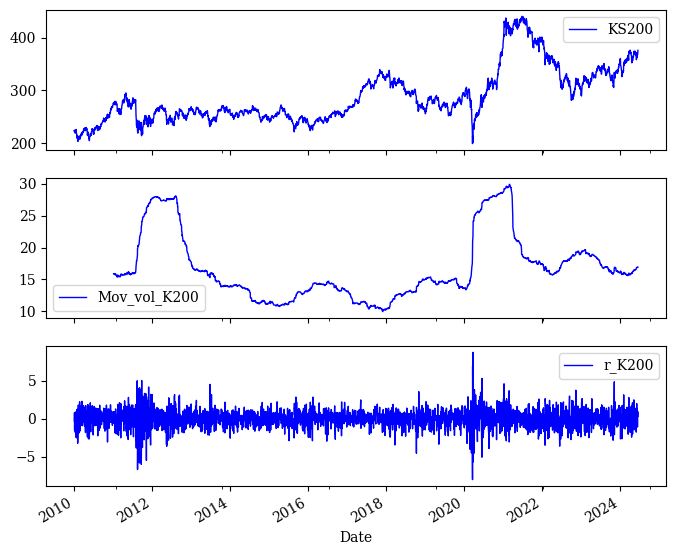

In [ ]:
eqt[['KS200','Mov_vol_K200', 'r_K200']].plot(subplots=True, style='b', lw='1', figsize=(8,7))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

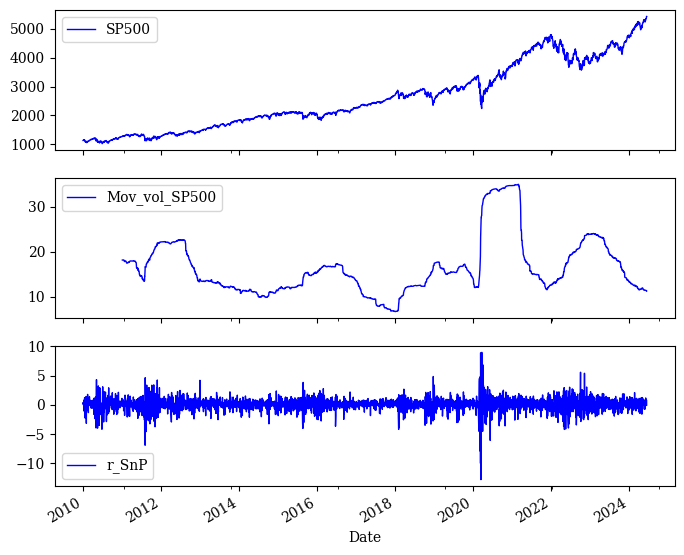

In [ ]:
eqt[['SP500','Mov_vol_SP500', 'r_SnP']].plot(subplots=True, style='b', lw='1', figsize=(8,7))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

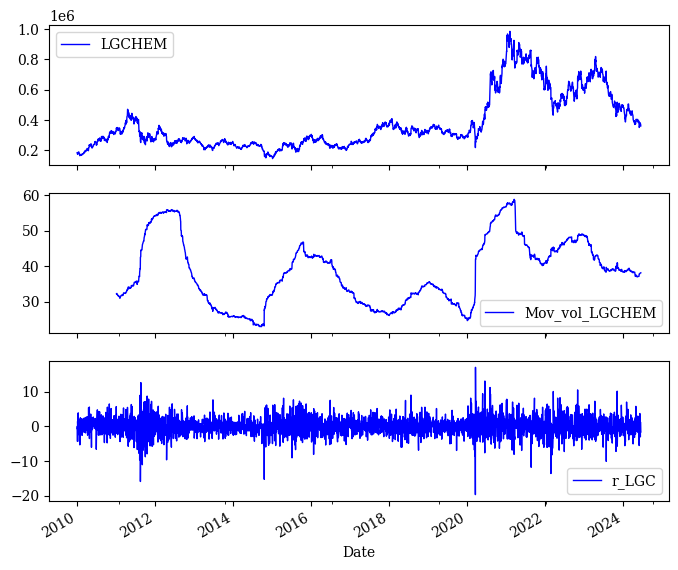

In [ ]:
eqt[['LGCHEM','Mov_vol_LGCHEM', 'r_LGC']].plot(subplots=True, style='b', lw='1', figsize=(8,7))

In [ ]:
pr = eqt[['KS200','SP500','LGCHEM']]
pr.head()

,KS200,SP500,LGCHEM
Date,,,
2010-01-04,223.490005,1132.989990,183973.515625
2010-01-05,222.839996,1136.520020,182741.546875
2010-01-06,224.669998,1137.140015,182741.546875
2010-01-07,221.309998,1141.689941,174939.093750
2010-01-08,222.660004,1144.979980,177403.015625


In [ ]:
print(pr.describe())
print('skeness: ', pr.skew(axis=0))
print('kurtosis: ', pr.kurtosis(axis=0))

             KS200        SP500         LGCHEM
count  3432.000000  3432.000000    3432.000000
mean    288.258243  2616.196562  376037.649266
std      51.117305  1144.007073  182876.572566
min     199.279999  1022.580017  144974.718750
25%     251.720001  1684.994965  247480.437500
50%     269.645004  2358.030029  306934.218750
75%     317.144997  3515.609924  459583.375000
max     440.399994  5433.740234  985340.875000
skeness:  KS200     1.080377
SP500     0.538608
LGCHEM    1.252053
dtype: float64
kurtosis:  KS200     0.587023
SP500    -0.850573
LGCHEM    0.504596
dtype: float64


In [ ]:
pr.corr()

,KS200,SP500,LGCHEM
KS200,1.000000,0.839818,0.860933
SP500,0.839818,1.000000,0.762042
LGCHEM,0.860933,0.762042,1.000000


In [ ]:
rt = eqt[['r_K200','r_SnP', 'r_LGC']]
rt.head()

,r_K200,r_SnP,r_LGC
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,-0.291269,0.311083,-0.671897
2010-01-06,0.817864,0.054537,0.000000
2010-01-07,-1.506823,0.399322,-4.363496
2010-01-08,0.608154,0.287758,1.398619


In [ ]:
rt.corr()

,r_K200,r_SnP,r_LGC
r_K200,1.000000,0.243127,0.575951
r_SnP,0.243127,1.000000,0.132801
r_LGC,0.575951,0.132801,1.000000


In [ ]:
n=10000; r=0.0325
x_vol=0.1981; y_vol=0.2121; z_vol=0.3877
n0=date.toordinal(date(2024, 6, 20))  # 최초 기준가격 결정일
n1=date.toordinal(date(2024, 12, 17))  # 1차 조기 상환일
n2=date.toordinal(date(2025, 6, 17))  # 2차 조기 상환일
n3=date.toordinal(date(2025 , 12, 16))  # 3차 조기 상환일
n4=date.toordinal(date(2026, 6, 16))  # 4차 조기 상환일
n5=date.toordinal(date(2026, 6, 16))  # 5차 조기 상환일
n6=date.toordinal(date(2027, 6, 15))  # 만기 상환일
check_day=np.array([n1-n0, n2-n0, n3-n0, n4-n0, n5-n0, n6-n0])
rho_xy=0.2745; rho_xz=0.189; rho_yz=0.6083  # 상관계수
corr=np.array([[1, rho_xy, rho_xz], [rho_xy, 1, rho_yz], [rho_xz, rho_yz, 1]])
k=np.linalg.cholesky(corr)
oneyear=365; tot_date=n6-n0; dt=1/oneyear
S1=np.zeros((tot_date+1, 1))
S2=np.zeros((tot_date+1, 1))
S3=np.zeros((tot_date+1, 1))
S1[0]=100.0; S2[0]=100.0; S3[0]=100.0
ratio_S1=S1[0]; ratio_S2=S2[0]; ratio_S3=S3[0]
strike_price=np.array([0.90, 0.90, 0.85, 0.85, 0.80, 0.75])  # 조기 행사가격
repay_n=len(strike_price) # 조기상환 횟수
coupon_rate=np.array([0.079, 0.158, 0.237, 0.316, 0.395, 0.474])  # 조기 상환시 쿠폰 이자율
tot_payoff=np.zeros([repay_n, 1])  # 전체 페이오프
payoff=np.zeros([repay_n, 1])  # 페이오프
discount_payoff=np.zeros([repay_n, 1])  # 페이오프의 현가
payment=np.zeros([repay_n, 1])
facevalue=10**4  # 액면금액
kib=0.5; dummy=0.474  # 낙인 배리어, 더미 이자율
early_count = np.zeros([repay_n, 1]) # 각 조기상환기간 충족횟수
maturity_count = 0 # 만기상환 발생횟수
lose_count = 0 # 만기손실 발생횟수
for j in range(repay_n):
    payment[j]=facevalue*(1+coupon_rate[j])

In [ ]:
for i in range(n):
    w0=np.random.normal(0, 1, size=[tot_date, 3])  # 만기상환일 만큼의 난수 생성
    w0=np.transpose(w0)
    w=np.matmul(k, w0)
    payoff=np.zeros([repay_n, 1]); repay_event=0
    for j in range(tot_date):
        S1[j+1]=S1[j]*np.exp((r-0.5*x_vol**2)*dt+x_vol*np.sqrt(dt)*w[0, j])  #
        S2[j+1]=S2[j]*np.exp((r-0.5*y_vol**2)*dt+y_vol*np.sqrt(dt)*w[1, j])  #
        S3[j+1]=S3[j]*np.exp((r-0.5*z_vol**2)*dt+z_vol*np.sqrt(dt)*w[2, j])  #
    R1=S1/ratio_S1; R2=S2/ratio_S2; R3=S3/ratio_S3
    WP=np.minimum(R1, R2, R3)
    WP_checkday=WP[check_day]

    for j in range(repay_n):
        if WP_checkday[j] >= strike_price[j]:  # 조기상환일에 주가를 체크, 조기 상환여부 결정
            payoff[j]=payment[j]
            early_count[j] += 1
            repay_event=1
            break
    if repay_event == 0:  # 조기상환 되지 않고 만기까지 온 경우
       if min(WP) > kib:  # 낙인 배리어 아래로 내려간 적이 없는 경우
           payoff[-1]=facevalue*(1+dummy)
           maturity_count += 1
       else:  # 낙인 배리어 아래로 내려간 적이 있는 경우
           payoff[-1]=facevalue*WP[-1]
           lose_count += 1
    tot_payoff=tot_payoff + payoff
mean_payoff=tot_payoff/n
for j in range(repay_n):  # 페이오프를 무위험 이자율로 할인하여 현재 가격을 구함
    discount_payoff[j]=mean_payoff[j]*np.exp(-r*check_day[j]/oneyear)
price=np.sum(discount_payoff)
print(price)

10862.551366064565


In [ ]:
print('총 시뮬레이션 횟수 : %d' % (n))
print('조기상환 발생횟수')
for j in range(repay_n):
    print('%d차 : %d, 발생빈도 : %.2f' % (j+1, early_count[j], early_count[j]/n*100),"%")

print('만기상환 발생횟수 : %d, 발생빈도 : %.2f' % (maturity_count, (maturity_count)/n*100), "%")
print('만기손실 발생횟수 : %d, 발생빈도 : %.2f' % (lose_count, (lose_count/n)*100), "%")

총 시뮬레이션 횟수 : 10000
조기상환 발생횟수
1차 : 6299, 발생빈도 : 62.99 %
2차 : 895, 발생빈도 : 8.95 %
3차 : 722, 발생빈도 : 7.22 %
4차 : 308, 발생빈도 : 3.08 %
5차 : 208, 발생빈도 : 2.08 %
6차 : 392, 발생빈도 : 3.92 %
만기상환 발생횟수 : 690, 발생빈도 : 6.90 %
만기손실 발생횟수 : 486, 발생빈도 : 4.86 %


<ipython-input-20-0e48ea33c432>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%d차 : %d, 발생빈도 : %.2f' % (j+1, early_count[j], early_count[j]/n*100),"%")


In [ ]:
def thomas(alpha, beta, gamma, f):
    n=len(f)
    v=np.zeros(n)
    [aa, dd, cc, bb]=map(np.array,[alpha, beta, gamma, f])
    for i in range(1, n):
        mult=aa[i]/dd[i-1]
        dd[i]=dd[i]-mult*cc[i-1]
        bb[i]=bb[i]-mult*bb[i-1]
    v[n-1]=bb[n-1]/dd[n-1]
    for i in range(n-2, -1, -1):
        v[i]=(bb[i]-cc[i]*v[i+1])/dd[i]
    return v

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

facevalue=10000;
x_volatility=0.1981; y_volatility=0.2121; z_volatility=0.3877 # 각각의 변동성
rho_xy=0.2745; rho_yz=0.189; rho_zx=0.6083; # 상관계수
r=0.0325;  # 무위험 이자율
T=3; # 만기
x0=100; y0=100; z0=100;  # 최초 기준가격
# 조기상환시 쿠폰 이자율
coupon_rate=np.array([0.474, 0.395, 0.316, 0.237, 0.158, 0.079])
# 조기행사가
strike_price=np.array([0.75, 0.80, 0.85, 0.85, 0.90, 0.90])
dummy=0.474; kib=0.50; # 더미 이자율, 낙인 배리어

In [ ]:
Nt=360*T; dt=T/Nt; # 시간격자 갯수, 시간격자 간격
A=np.array([0]); B=np.arange(65,132.5,2.5); C=np.array([160,180,200,220]);
x=np.r_[A,B,C]; y=x; z=x;
# x, y, z벡터의 크기
Nx=len(x); Ny=Nx; Nz=Nx;
hx=np.diff(x); hy=hx; hz=hx;
step=np.arange(1,8,1)*Nt/6
lst=[Nx,Ny,Nz]
[u,ku]=map(np.zeros,[lst,lst])
# 유한차분법으로 ELS 가격을 구하기 위한 초기값
for i in range(0,Nx):
    for j in range(0,Ny):
        for k in range(0,Nz):
            if (x[i]<=kib*x0 or y[j]<=kib*y0 or z[k]<=kib*z0):
                u[i,j,k]=np.min([x[i],y[j],z[k]])/x0*facevalue
                ku[i,j,k]=np.min([x[i],y[j],z[k]])/x0*facevalue
            elif (x[i]<strike_price[0]*x0 or y[j]<strike_price[0]*y0 or z[k]<strike_price[0]*z0):
                u[i,j,k]=facevalue*(1.0+dummy)
                ku[i,j,k]=np.min([x[i],y[j],z[k]])/x0*facevalue
            else:
                u[i,j,k]=facevalue*(1+coupon_rate[0])
                ku[i,j,k]=facevalue*(1+coupon_rate[0])
# 유한차분법을 사용하기 위한 계수
[ax,dx,cx,ay,dy,cy,az,dz,cz]=map(np.zeros,[Nx-2,Nx-2,Nx-2,Ny-2,Ny-2,Ny-2,Nz-2,Nz-2,Nz-2])
ax[:]=(-(x_volatility*x[1:Nx-1])**2+r*x[1:Nx-1]*hx[1:Nx-1])/(hx[0:Nx-2]*(hx[0:Nx-2]+hx[1:Nx-1]))
dx[:]=1/dt+(x_volatility*x[1:Nx-1])**2/(hx[0:Nx-2]*hx[1:Nx-1])-r*x[1:Nx-1]*(hx[1:Nx-1]-hx[0:Nx-2])/(hx[0:Nx-2]*hx[1:Nx-1])+r/3
cx[:]=-((x_volatility*x[1:Nx-1])**2+r*x[1:Nx-1]*hx[0:Nx-2])/(hx[1:Nx-1]*(hx[0:Nx-2]+hx[1:Nx-1]))
# 선형 경계조건
ax[Nx-3]=ax[Nx-3]-cx[Nx-3]
dx[Nx-3]=dx[Nx-3]+2*cx[Nx-3]
ay[:]=(-(y_volatility*y[1:Ny-1])**2+r*y[1:Ny-1]*hy[1:Ny-1])/(hy[0:Ny-2]*(hy[0:Ny-2]+hy[1:Ny-1]))
dy[:]=1/dt+(y_volatility*y[1:Ny-1])**2/(hy[0:Ny-2]*hy[1:Ny-1])-r*y[1:Ny-1]*(hy[1:Ny-1]-hy[0:Ny-2])/(hy[0:Ny-2]*hy[1:Ny-1])+r/3
cy[:]=-((y_volatility*y[1:Ny-1])**2+r*y[1:Ny-1]*hy[0:Ny-2])/(hy[1:Ny-1]*(hy[0:Ny-2]+hy[1:Ny-1]))
ay[Ny-3]=ay[Ny-3]-cy[Ny-3]
dy[Ny-3]=dy[Ny-3]+2*cy[Ny-3]
az[:]=(-(z_volatility*z[1:Nz-1])**2+r*z[1:Nz-1]*hz[1:Nz-1])/(hz[0:Nz-2]*(hz[0:Nz-2]+hz[1:Nz-1]))
dz[:]=1/dt+(z_volatility*z[1:Nz-1])**2/(hz[0:Nz-2]*hz[1:Nz-1])-r*z[1:Nz-1]*(hz[1:Nz-1]-hz[0:Nz-2])/(hz[0:Nz-2]*hz[1:Nz-1])+r/3
cz[:]=-((z_volatility*z[1:Nz-1])**2+r*z[1:Nz-1]*hz[0:Nz-2])/(hz[1:Nz-1]*(hz[0:Nz-2]+hz[1:Nz-1]))
az[Nz-3]=az[Nz-3]-cz[Nz-3]
dz[Nz-3]=dz[Nz-3]+2*cz[Nz-3]
# OS방법을 사용하기 위해 u, ku와 같은 초기의 행렬 생성
[old_u,old_ku]=map(np.zeros,[lst,lst])
[fx,fy,fz]=map(np.zeros,[Nx-2,Nx-2,Nx-2])
tag=0

for iter in range(0,Nt):
    # 조기상환일의 페이오프
    if iter==step[tag]:
        gx=np.min(np.where(x>=x0*strike_price[tag+1]))
        gy=np.min(np.where(y>=y0*strike_price[tag+1]))
        gz=np.min(np.where(z>=z0*strike_price[tag+1]))
        u[gx:Nx,gy:Ny,gz:Nz]=facevalue*(1+coupon_rate[tag+1])
        ku[gx:Nx,gy:Ny,gz:Nz]=facevalue*(1+coupon_rate[tag+1])
        tag += 1
    gx=np.min(np.where(x>=x0*kib))
    gy=np.min(np.where(y>=y0*kib))
    gz=np.min(np.where(z>=z0*kib))
    u[0:gx+1,:,:]=ku[0:gx+1,:,:];
    u[:,0:gy+1,:]=ku[:,0:gy+1,:];
    u[:,:,0:gz+1]=ku[:,:,0:gz+1]
    # OSM과 토마스 알고리즘을 이용하여 u값 계산
    # x축으로 풀기
    for j in range(1,Ny-1):
        for k in range(1,Nz-1):
            fx[0:Nx-1]=1/3*rho_xy*x_volatility\
              *y_volatility*x[1:Nx-1]*y[j]\
              *(u[2:Nx,j+1,k]-u[2:Nx,j-1,k]\
              -u[0:Nx-2,j+1,k]+u[0:Nx-2,j-1,k])\
              /(hx[0:Nx-2]*hy[j]+hx[1:Nx-1]\
              *hy[j]+hx[1:Nx-1]*hy[j-1]+hx[0:Nx-2]\
              *hy[j-1])+1/3*rho_zx*x_volatility\
              *z_volatility*x[1:Nx-1]*z[k]\
              *(u[2:Nx,j,k+1]-u[2:Nx,j,k-1]\
              -u[0:Nx-2,j,k+1]+u[0:Nx-2,j,k-1])\
              /(hx[0:Nx-2]*hz[k]+hx[1:Nx-1]*hz[k]\
              +hx[1:Nx-1]*hz[k-1]+hx[0:Nx-2]*hz[k-1])\
              +1/3*rho_yz*y_volatility*z_volatility\
              *y[j]*z[k]*(u[1:Nx-1,j+1,k+1]\
              -u[1:Nx-1,j+1,k-1]-u[1:Nx-1,j-1,k+1]\
              +u[1:Nx-1,j-1,k-1])/(hy[j-1]*hz[k]\
              +hy[j]*hz[k]+hy[j]*hz[k-1])+hy[j-1]\
              *hz[k-1]+u[1:Nx-1,j,k]/dt
            old_u[1:Nx-1,j,k]=thomas(ax,dx,cx,fx)
    old_u[1:Nx-1,1:Ny-1,Nz-1]=2*old_u[1:Nx-1,1:Ny-1,Nz-2]-old_u[1:Nx-1,1:Ny-1,Nz-3]
    old_u[Nx-1,1:Ny-1,1:Nz]=2*old_u[Nx-2,1:Ny-1,1:Nz]-old_u[Nx-3,1:Ny-1,1:Nz]
    old_u[1:Nx,Ny-1,1:Nz]=2*old_u[1:Nx,Ny-2,1:Nz]-old_u[1:Nx,Ny-3,1:Nz]
    # y축으로 풀기
    for k in range(1,Nz-1):
        for i in range(1,Nx-1):
            fy[0:Ny-1]=1/3*rho_xy*x_volatility\
              *y_volatility*x[i]*y[1:Ny-1]\
              *(old_u[i+1,2:Ny,k]-old_u[i+1\
              ,0:Ny-2,k]-old_u[i-1,2:Ny,k]\
              +old_u[i-1,0:Ny-2,k])/(hx[i-1]\
              *hy[1:Ny-1]+hx[i]*hy[1:Ny-1]\
              +hx[i]*hy[0:Ny-2]+hx[i-1]\
              *hy[0:Ny-2])+1/3*rho_zx\
              *x_volatility*z_volatility\
              *x[i]*z[k]*(old_u[i+1,1:Ny-1,k+1]\
              -old_u[i+1,1:Ny-1,k-1]-old_u[i-1\
              ,1:Ny-1,k+1]+old_u[i-1,1:Ny-1,k-1])\
              /(hx[i-1]*hz[k]+hx[i]*hz[k]\
              +hx[i]*hz[k-1]+hx[i-1]*hz[k-1])\
              +1/3*rho_yz*y_volatility\
              *z_volatility*y[1:Ny-1]*z[k]\
              *(old_u[i,2:Ny,k+1]-old_u[i,2:Ny,k-1]\
              -old_u[i,0:Ny-2,k+1]+old_u[i,0:Ny-2\
              ,k-1])/(hy[0:Ny-2]*hz[k]+hy[1:Ny-1]\
              *hz[k]+hy[1:Ny-1]*hz[k-1]+hy[0:Ny-2]\
              *hz[k-1])+old_u[i,1:Ny-1,k]/dt
            u[i,1:Ny-1,k]=thomas(ay,dy,cy,fy)
    u[1:Nx-1,1:Ny-1,Nz-1]=2*u[1:Nx-1,1:Ny-1,Nz-2]-u[1:Nx-1,1:Ny-1,Nz-3]
    u[Nx-1,1:Ny-1,1:Nz]=2*u[Nx-2,1:Ny-1,1:Nz]-u[Nx-3,1:Ny-1,1:Nz]
    u[1:Nx,Ny-1,1:Nz]=2*u[1:Nx,Ny-2,1:Nz]-u[1:Nx,Ny-3,1:Nz]
    # z 축으로 풀기
    for j in range(1,Ny-1):
        for i in range(1,Nx-1):
            fz[0:Nz-1]=1/3*rho_xy*x_volatility\
              *y_volatility*x[i]*y[j]\
              *(u[i+1,j+1,1:Nz-1]-u[i+1,j-1,1:Nz-1]\
              -u[i-1,j+1,1:Nz-1]+u[i-1,j-1,1:Nz-1])\
              /(hx[i-1]*hy[j]+hx[i]*hy[j]+hx[i]\
              *hy[j-1]+hx[i-1]*hy[j-1])+1/3*rho_zx\
              *x_volatility*z_volatility*x[i]\
              *z[1:Nz-1]*(u[i+1,j,2:Nz]-u[i+1,j,0:Nz-2]-u[i-1,j,2:Nz]\
              +u[i-1,j,0:Nz-2])/(hx[i-1]*hz[1:Nz-1]\
              +hx[i]*hz[1:Nz-1]+hx[i]*hz[0:Nz-2]\
              +hx[i-1]*hz[0:Nz-2])+1/3*rho_yz\
              *y_volatility*z_volatility*y[j]*z[1:Nz-1]*(u[i,j+1,2:Nz]\
              -u[i,j+1,0:Nz-2]-u[i,j-1,2:Nz]+u[i,j-1,0:Nz-2])/(hy[j-1]\
              *hz[1:Nz-1]+hy[j]*hz[1:Nz-1]\
              +hy[j]*hz[0:Nz-2]+hy[j-1]*hz[0:Nz-2])\
              +u[i,j,1:Nz-1]/dt
            old_u[i,j,1:Nz-1]=thomas(az,dz,cz,fz)
    old_u[1:Nx-1,1:Ny-1,Nz-1]=2*old_u[1:Nx-1,1:Ny-1,Nz-2]-old_u[1:Nx-1,1:Ny-1,Nz-3]
    old_u[Nx-1,1:Ny-1,1:Nz]=2*old_u[Nx-2,1:Ny-1,1:Nz]-old_u[Nx-3,1:Ny-1,1:Nz]
    old_u[1:Nx,Ny-1,1:Nz]=2*old_u[1:Nx,Ny-2,1:Nz]-old_u[1:Nx,Ny-3,1:Nz]
    u=old_u

    # OSM과 토마스 알고리즘을 이용하여 ku값 계산
    # x 축으로 풀기
    for j in range(1,Ny-1):
        for k in range(1,Nz-1):
            fx[0:Nx-1]=1/3*rho_xy*x_volatility\
              *y_volatility*x[1:Nx-1]*y[j]\
              *(ku[2:Nx,j+1,k]-ku[2:Nx,j-1,k]\
              -ku[0:Nx-2,j+1,k]+ku[0:Nx-2,j-1,k])\
              /(hx[0:Nx-2]*hy[j]+hx[1:Nx-1]*hy[j]\
              +hx[1:Nx-1]*hy[j-1]+hx[0:Nx-2]*hy[j-1])\
              +1/3*rho_zx*x_volatility*z_volatility\
              *x[1:Nx-1]*z[k]*(ku[2:Nx,j,k+1]\
              -ku[2:Nx,j,k-1]-ku[0:Nx-2,j,k+1]\
              +ku[0:Nx-2,j,k-1])/(hx[0:Nx-2]*hz[k]\
              +hx[1:Nx-1]*hz[k]+hx[1:Nx-1]*hz[k-1]\
              +hx[0:Nx-2]*hz[k-1])+1/3*rho_yz\
              *y_volatility*z_volatility*y[j]\
              *z[k]*(ku[1:Nx-1,j+1,k+1]\
              -ku[1:Nx-1,j+1,k-1]-ku[1:Nx-1,j-1,k+1]\
              +ku[1:Nx-1,j-1,k-1])/(hy[j-1]*hz[k]\
              +hy[j]*hz[k]+hy[j]*hz[k-1]+hy[j-1]\
              *hz[k-1])+ku[1:Nx-1,j,k]/dt
            old_ku[1:Nx-1,j,k]=thomas(ax,dx,cx,fx)
    old_ku[1:Nx-1,1:Ny-1,Nz-1]=2*old_ku[1:Nx-1,1:Ny-1,Nz-2]-old_ku[1:Nx-1,1:Ny-1,Nz-3]
    old_ku[Nx-1,1:Ny-1,1:Nz]=2*old_ku[Nx-2,1:Ny-1,1:Nz]-old_ku[Nx-3,1:Ny-1,1:Nz]
    old_ku[1:Nx,Ny-1,1:Nz]=2*old_ku[1:Nx,Ny-2,1:Nz]-old_ku[1:Nx,Ny-3,1:Nz]
    # y 축으로 풀기
    for k in range(1,Nz-1):
        for i in range(1,Nx-1):
             fy[0:Ny-1]=1/3*rho_xy*x_volatility\
              *y_volatility*x[i]*y[1:Ny-1]\
              *(old_ku[i+1,2:Ny,k]-old_ku[i+1,0:Ny-2,\
              k]-old_ku[i-1,2:Ny,k]+old_ku[i-1,0:Ny-2,k])/(hx[i-1]\
              *hy[1:Ny-1]+hx[i]*hy[1:Ny-1]+hx[i]\
              *hy[0:Ny-2]+hx[i-1]*hy[0:Ny-2])+1/3\
              *rho_zx*x_volatility*z_volatility\
              *x[i]*z[k]*(old_ku[i+1,1:Ny-1,k+1]\
              -old_ku[i+1,1:Ny-1,k-1]-old_ku[i-1,\
              1:Ny-1,k+1]+old_ku[i-1,1:Ny-1,k-1])/\
              (hx[i-1]*hz[k]+hx[i]*hz[k]+hx[i]*hz[k-1]\
              +hx[i-1]*hz[k-1])+1/3*rho_yz*\
              y_volatility*z_volatility*y[1:Ny-1]*z[k]\
              *(old_ku[i,2:Ny,k+1]-old_ku[i,2:Ny,k-1]\
              -old_ku[i,0:Ny-2,k+1]+old_ku[i,0:Ny-2\
              ,k-1])/(hy[0:Ny-2]*hz[k]+hy[1:Ny-1]\
              *hz[k]+hy[1:Ny-1]*hz[k-1]+hy[0:Ny-2]\
              *hz[k-1])+old_ku[i,1:Ny-1,k]/dt
             ku[i,1:Ny-1,k]=thomas(ay,dy,cy,fy)
    ku[1:Nx-1,1:Ny-1,Nz-1]=2*ku[1:Nx-1,1:Ny-1,Nz-2]-ku[1:Nx-1,1:Ny-1,Nz-3]
    ku[Nx-1,1:Ny-1,1:Nz]=2*ku[Nx-2,1:Ny-1,1:Nz]-ku[Nx-3,1:Ny-1,1:Nz]
    ku[1:Nx,Ny-1,1:Nz]=2*ku[1:Nx,Ny-2,1:Nz]-ku[1:Nx,Ny-3,1:Nz]
    # z 축으로 풀기
    for j in range(1,Ny-1):
        for i in range(1,Nx-1):
            fz[0:Nz-1]=1/3*rho_xy*x_volatility\
              *y_volatility*x[i]*y[j]*(ku[i+1,j+1,1:Nz-1]\
              -ku[i+1,j-1,1:Nz-1]-ku[i-1,j+1,1:Nz-1]\
              +ku[i-1,j-1,1:Nz-1])/(hx[i-1]\
              *hy[j]+hx[i]*hy[j]+hx[i]*hy[j-1]\
              +hx[i-1]*hy[j-1])+1/3*rho_zx\
              *x_volatility*z_volatility*x[i]\
              *z[1:Nz-1]*(ku[i+1,j,2:Nz]\
              -ku[i+1,j,0:Nz-2]-ku[i-1,j,2:Nz]\
              +ku[i-1,j,0:Nz-2])/(hx[i-1]\
              *hz[1:Nz-1]+hx[i]*hz[1:Nz-1]\
              +hx[i]*hz[0:Nz-2]+hx[i-1]\
              *hz[0:Nz-2])+1/3*rho_yz\
              *y_volatility*z_volatility*y[j]\
              *z[1:Nz-1]*(ku[i,j+1,2:Nz]\
              -ku[i,j+1,0:Nz-2]-ku[i,j-1,2:Nz]\
              +ku[i,j-1,0:Nz-2])/(hy[j-1]\
              *hz[1:Nz-1]+hy[j]*hz[1:Nz-1]\
              +hy[j]*hz[0:Nz-2]+hy[j-1]\
              *hz[0:Nz-2])+ku[i,j,1:Nz-1]/dt
            old_ku[i,j,1:Nz-1]=thomas(az,dz,cz,fz)
    old_ku[1:Nx-1,1:Ny-1,Nz-1]=2*old_ku[1:Nx-1,1:Ny-1,Nz-2]-old_ku[1:Nx-1,1:Ny-1,Nz-3]
    old_ku[Nx-1,1:Ny-1,1:Nz]=2*old_ku[Nx-2,1:Ny-1,1:Nz]-old_ku[Nx-3,1:Ny-1,1:Nz]
    old_ku[1:Nx,Ny-1,1:Nz]=2*old_ku[1:Nx,Ny-2,1:Nz]-old_ku[1:Nx,Ny-3,1:Nz]
    ku=old_ku

ii=np.where(x==100)
jj=np.where(y==100)
kk=np.where(z==100)
print('Price=%f'%(u[ii,jj,kk]))

Price=9441.589971


<ipython-input-23-d04490a9a9ae>:223: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Price=%f'%(u[ii,jj,kk]))
